In [22]:
import kwant

In [23]:
import matplotlib.pyplot as plt

In [24]:
from cmath import exp
from math import pi

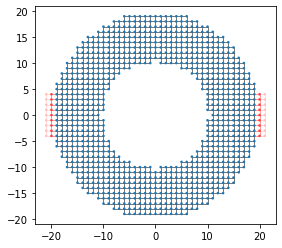

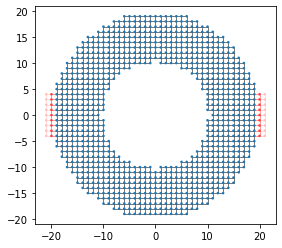

In [25]:
def make_system(a=1, t=1.0, W=10, r1=10, r2=20):
    

    lat = kwant.lattice.square(a)
    syst = kwant.Builder()

    def ring(pos):
        (x, y) = pos
        rsq = x ** 2 + y ** 2
        return (r1 ** 2 < rsq < r2 ** 2)

    
    syst[lat.shape(ring, (0, r1 + 1))] = 4 * t
    syst[lat.neighbors()] = -t

    
    def phase_shift(site1, site2, phi):
        return -t * exp(1j * phi)

    def branchcut(hop):
        ix0, iy0 = hop[0].tag
        return iy0 < 0 and ix0 == 1  

    def hops_across_cut(syst):
        for hop in kwant.builder.HoppingKind((1, 0), lat, lat)(syst):
            if branchcut(hop):
                yield hop
    syst[hops_across_cut] = phase_shift

    
    # define lead
    sym_lead = kwant.TranslationalSymmetry((-a, 0))
    lead = kwant.Builder(sym_lead)

    def lead_shape(pos):
        (x, y) = pos
        return (-W / 2 < y < W / 2)

    lead[lat.shape(lead_shape, (0, 0))] = 4 * t
    lead[lat.neighbors()] = -t

    # Attach the leads and return the system
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst
kwant.plot(syst)


In [26]:
def plot_conductance(syst, energy, fluxes):
    

    normalized_fluxes = [flux / (2 * pi) for flux in fluxes]
    data = []
    for flux in fluxes:
        smatrix = kwant.smatrix(syst, energy, params=dict(phi=flux))
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(normalized_fluxes, data)
    plt.xlabel("flux [flux quantum]")
    plt.ylabel("conductance [e^2/h]")
    plt.title("periodic conductance in the quantum ring due to magnetic flux")
    plt.show()

In [27]:
syst = make_system()
sys= syst.finalized()

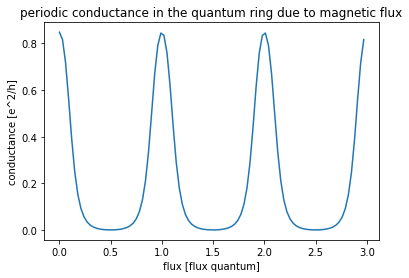

In [28]:
plot_conductance(sys, energy=0.3, fluxes=[0.01 * i * 3 * 2 * pi for i in range(100)])